In [12]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

# Practicing with Chi Square distribution on discrete data
In this exercise, we will be practicing using the case of checking if a dice is fair.
To do this, we compare the frequencies of obtaining each number from a sample of throws to the theoretical frequencies of a fair dice.

First, let us set the bins, ie : the possible values that can come out of our experiment. To underline that these values have no mathematical significance, instead of 1, 2, 3 etc. , use strings "one", "two", "three" etc. .
Create an array of possible values, an array containing their probabilities, and an array containing the expected occurence freauencies for a sample size (number of throws) of 60.

In [3]:
Ns = 60

possible_values = np.array(["one","two","three","four","five","six"])
proba_unnormed = np.array([1,1,1,1,1,1])

proba = proba_unnormed/proba_unnormed.sum()
print(proba.sum())

expected = Ns * proba
print(expected)

0.9999999999999999
[10. 10. 10. 10. 10. 10.]


For our chi square test to be reliable, it is recommended to have a minimum of 5 results per bin / category.
Add a test to check if this is the case for **Ns=60**.

In [4]:
if np.min(expected)<=5:
    print("WARNING: not enough points to get a statistically significant result.")

Now, load the values from _dice1.csv_. Using a for loop, go through the possible values and count the number of occurences of this result in the sample. Use this to calculate the chi square statistic.  

To count the number of occurences, you may want to use the *np.count_nonzero()* function while passing as argument the condition you want to see verified. For exemple : *np.count_nonzero(my_array=="two")* will return the number of times that the string _"two"_ is in *my_array*.

In truth, *my_array=="two"* returns an array of True and False depending on if the elements satisfy the condition, and *np.count_nonzero()* counts the number of nonzero, ie True.

In [5]:
observed_values = np.loadtxt('dice2.csv', dtype=type(""))

observed_frequencies = []
chi2List = []

for i in range(len(possible_values)):
     observed = np.count_nonzero(observed_values==possible_values[i])

     chi2i = (observed-expected[i])**2/(expected[i])

     observed_frequencies.append(observed)
     chi2List.append(chi2i)

print(np.sum(observed_frequencies) )

print(observed_frequencies)
chi2 = np.sum(chi2List)
print(chi2)


60
[5, 21, 8, 11, 11, 4]
18.8


Can you say with a confidence level of 99% that the dice is fair ?  
The chi square value for $\alpha=0.01$ and $6-1$ degrees of freedom is 15.086

Perform the same test for dice2.csv.

# Chi Squared on continuous distribution
For continuous data, binning can be more challenging. One must choose a number of bins, their size and the size of the sample.
In this exercise, we will consider a sample of fiber-reinforced polymers that you have produced. After putting them under strain, you wish to see the propagation of cracks through the sample to study their response and potential application in nautical transport.   

To do so, you write down the length of cracks for each polymer. If they follow a gaussian distribution, the material responds evenly to the stress and the process can be sold. However if the process follows a laplace distribution, this might indicate the presence of imperfections, and the process is too dangerous.

The laplace and normal cumulative distribution function are given below. We are considering a mean crack length of 0cm, with a standard deviation of 1cm.

In [6]:
mean = 3

def laplace(x, mean=0, lam=1):
    return np.exp(-np.abs(x-mean)/lam)/(2*lam)

def laplace_cdf(x, mean=0, lam=1):
    return 1/2 + 1/2 * np.sign(x-mean)*(1-np.exp(-np.abs(x-mean))/lam)

def normal(x, sigma=1, mean=0):
    return np.exp(-(x-mean)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

def normal_cdf(x, sigma=1, mean=0):
    return 1/2 * ( 1 + scp.special.erf((x-mean)/(sigma*np.sqrt(2))) )

# plt.plot( normal_cdf(np.linspace(-5,5, 1000)) )
# plt.plot( laplace_cdf(np.linspace(-5,5, 1000)) )



To prepare the chi square study on the sample, we must first create a set of bins to categorise the different lengths.
Create a set of 10 bins centered around the mean, with bin a width of 0.5cm. Make sure both the first and last bins take into account the entire tail of the distributions (meaning they go to infinity).

In [7]:
bin_number = 10
bin_size = 0.5

bin_edges = np.arange(-bin_number/2 , bin_number/2 + 1, 1) * bin_size
bin_edges[0] = -np.inf; bin_edges[-1] = np.inf

print(bin_edges)

[-inf -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   inf]


Calculate the expected frequencies for both distribution in each bin, making use of the cumulative distribution functions.
Start with a number of samples of *Ns=2000*.

In [8]:
normal_expectected_frequencies = []
laplace_expectected_frequencies = []

Ns=2000
for i in range(bin_number):
    normal_probability = normal_cdf(bin_edges[i+1]) - normal_cdf(bin_edges[i]) if i!=0 else normal_cdf(bin_edges[i+1])
    normal_frequency = Ns * normal_probability
    
    laplace_probability = laplace_cdf(bin_edges[i+1]) - laplace_cdf(bin_edges[i]) if i!=0 else laplace_cdf(bin_edges[i+1])
    laplace_frequency = Ns * laplace_probability

    normal_expectected_frequencies.append(normal_frequency)
    laplace_expectected_frequencies.append(laplace_frequency)

normal_expectected_frequencies = np.array(normal_expectected_frequencies)
laplace_expectected_frequencies = np.array(laplace_expectected_frequencies)

# Sanity check
print( (normal_expectected_frequencies) )
print( (laplace_expectected_frequencies) )



[ 45.5002639   88.11413864 183.69610533 299.76456959 382.92492255
 382.92492255 299.76456959 183.69610533  88.11413864  45.5002639 ]
[135.33528324  87.79487691 144.74928102 238.65121854 393.46934029
 393.46934029 238.65121854 144.74928102  87.79487691 135.33528324]


Like previously, check that the expected frequencies are all superior then 5.

In [9]:
if np.min(normal_expectected_frequencies)<5 or np.min(normal_expectected_frequencies)<5:
    print("Error : A bin does not have the required minimum frequency")
else:
    print("Required frequency condition met.")

Required frequency condition met.


Load the data from _cracks.csv_.  
Use the _np.histogram()_ function seen previously, with the created bins, to categorise the sample data and get the frequencies.  

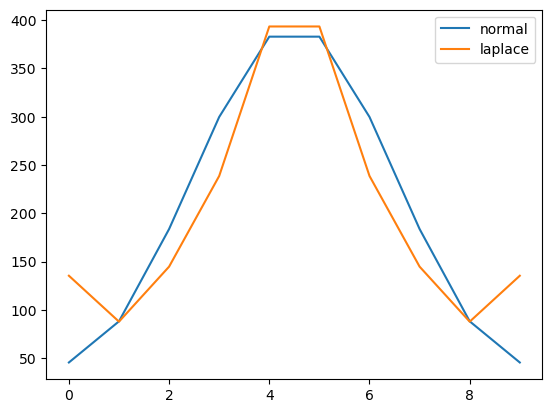

In [10]:
# observed_values = 1 * np.random.normal(size=Ns) + 0.2 * np.random.laplace(size=Ns)
observed_values = np.loadtxt('cracks.csv')

observed_frequencies = np.histogram(observed_values, bins=bin_edges)[0]

plt.plot(normal_expectected_frequencies, label='normal')
plt.plot(laplace_expectected_frequencies, label='laplace')
plt.legend()


Calculate the chi square statistic. Are your polymer samples safe for use with a confidence level of 99% ? 

In [11]:
print(f"--- Comparing to Normal Distribution : ")
print(f"Chi2 Stat : { np.sum( (observed_frequencies - normal_expectected_frequencies)**2 / normal_expectected_frequencies ) }")
print()
print(f"--- Comparing to Laplace Distribution : ")
print(f"Chi2 Stat : { np.sum( (observed_frequencies - laplace_expectected_frequencies)**2 / laplace_expectected_frequencies ) }")


--- Comparing to Normal Distribution : 
Chi2 Stat : 14.239115900937705

--- Comparing to Laplace Distribution : 
Chi2 Stat : 142.4570397875063
